# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


In [26]:
#all the methods
def mean(var):
    return np.mean(var)

def slope(xs,ys):
    mean_x=mean(xs)
    mean_y=mean(ys)
    mean_x_y=mean(np.multiply(xs,ys))
    squared_mean_x=mean_x**2
    mean_x_squared=mean(np.power(xs,2))
    slope=(mean_x*mean_y-mean_x_y)/(squared_mean_x-mean_x_squared)
    return slope

def y_int(xs,ys,slope):
    mean_x=mean(xs)
    mean_y=mean(ys)
    y_int=mean_y-slope*mean_x
    return y_int

def predicted_y(slope,y_int,xs):
    prediction=[]
    for x in xs:
        prediction.append(slope*x+y_int)
    return prediction

def sum_of_squared_errors(var1,var2): #inputs are actual values and predicted values
    errors=np.subtract(var1,var2)
    errors_squared=np.power(errors,2)
    return np.sum(errors_squared)

def r_squared(actual,predicted): #inputs are actual and predicted values
    sse=sum_of_squared_errors(actual,predicted)
    sst=sum_of_squared_errors(actual,np.mean(actual))
    r_squared=1-(sse/sst)
    return r_squared

def regression_diagnostics(xs,ys): #inputs are xs and ys
    m=slope(xs,ys)
    b=y_int(xs,ys,m)
    y_hat=predicted_y(m,b,xs)
    r_sqd=r_squared(ys,y_hat)
    print("Basic Regression Diagnostics")
    print("----------------------------")
    print(f"Slope: {round(m,2)}")
    print(f"Y-Intercept: {round(b,2)}")
    print(f"R-Squared: {round(r_sqd,2)}")
    print("----------------------------")
    print(f"Model: Y = {round(m,2)}*X + {round(b,2)}")
    plt.plot(xs,y_hat,label="Regression Line", color="red")
    plt.scatter(xs,ys,label="Data",color="blue")
    plt.legend()
    return



Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56*X + 6.33


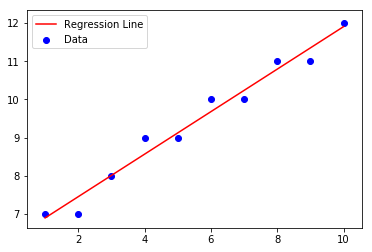

In [27]:
regression_diagnostics(X,Y)

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


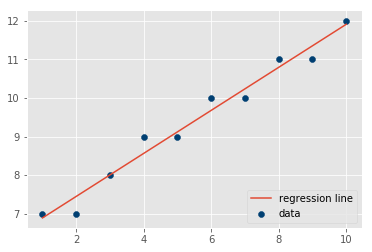

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56*X + 6.33


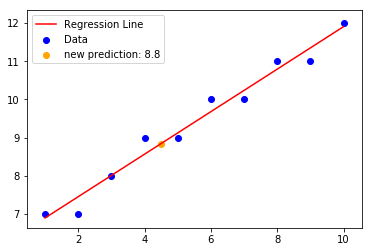

In [34]:
# Make prediction using given value and visualize on the scatter plot
new_x=4.5
m=slope(X,Y)
b=y_int(X,Y,m)
new_y=new_x*m+b
regression_diagnostics(X,Y)
plt.scatter(new_x,new_y,color="orange",label=f"new prediction: {round(new_y,1)}")
plt.legend()

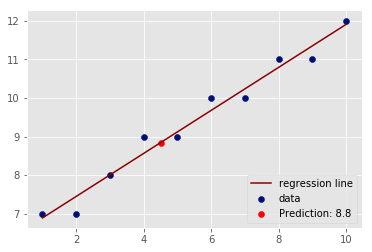

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 

Basic Regression Diagnostics
----------------------------
Slope: 5.54
Y-Intercept: -204.48
R-Squared: 0.96
----------------------------
Model: Y = 5.54*X + -204.48


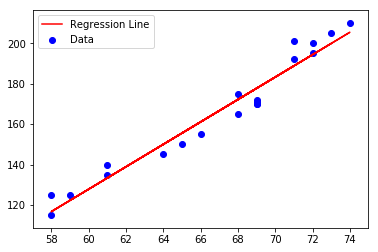

In [36]:
import pandas as pd
height_weight=pd.read_csv("heightWeight.csv")
regression_diagnostics(height_weight["height"],height_weight["weight"])

Basic Regression Diagnostics
----------------------------
Slope: 5.54
Y-Intercept: -204.48
R-Squared: 0.96
----------------------------
Model: Y = 5.54*X + -204.48


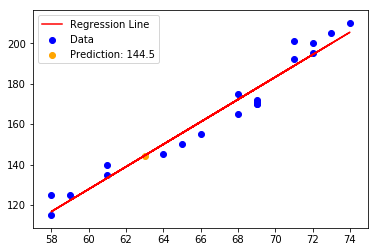

In [40]:
new_height=63
m=slope(height_weight["height"],height_weight["weight"])
b=y_int(height_weight["height"],height_weight["weight"],m)
new_weight=m*new_height+b
regression_diagnostics(height_weight["height"],height_weight["weight"])
plt.scatter(new_height,new_weight,color="orange",label=f"Prediction: {round(new_weight,1)}")
plt.legend()